<a href="https://colab.research.google.com/github/HeadlessAphid/LessonMaterials/blob/master/AI_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# This will be a Soccer Winning Predictions Machine Learning Project Where based on previous statistics whether or not the home team will win 

In [31]:
# Step1: Clean Our Data Set
# Step2: Split it into training and testing data with sklearn
# Step3: Train 3 different classifiers -Logistic Regression -Support Vector Machine -XGBoost 
# Step4: Pick the classifier with the best result and use it to predict the winning team

In [32]:
# Here we will be importing the dependencies

import pandas as pd
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from IPython.display import display

In [33]:
# Here we will be reading our datasets from our csv file that we downloaded

data = pd.read_csv('https://raw.githubusercontent.com/RudrakshTuwani/Football-Data-Analysis-and-Prediction/master/Datasets/final_dataset.csv')

display(data.head())

# Full Time Result (H=Home Win, D=Draw, A=Away)
# HTGD - Home team goal difference
# ATGD - Away team goal difference
# HTP - Home Team Points
# ATP - Away Team Points
# DiffFormPts Diff in Points
# DiffLP - Difference in last years prediction

# Input - 12 other features (fouls, goals, misses, corners, red cards, yellow cards)
# Output - Full Time Result (H=Home Win, D=Draw, A=Away Win)

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HomeTeamLP,AwayTeamLP,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,0,2000-08-19,Charlton,Man City,4,0,H,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,18.0,18.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,1,2000-08-19,Chelsea,West Ham,4,2,H,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,5.0,9.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-4.0
2,2,2000-08-19,Coventry,Middlesbrough,1,3,NH,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,14.0,12.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0
3,3,2000-08-19,Derby,Southampton,2,2,NH,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,16.0,15.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0
4,4,2000-08-19,Leeds,Everton,2,0,H,0,0,0,0,0.0,0.0,M,M,M,M,M,M,M,M,M,M,3.0,13.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,-10.0


In [34]:
# Here we will be exploring the dataset

# what is the win rate for the home team?

# Total number of matches.
n_matches = data.shape[0]

# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = data.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(data[data.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results.
print("Total number of matches: {}".format(n_matches))
print("Number of features: {}".format(n_features))
print("Number of matches won by the home team: {}".format(n_homewins))
print("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 6080
Number of features: 42
Number of matches won by the home team: 2816
Win rate of home team: 46.32%


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0dddd9db70>,
      dtype=object)

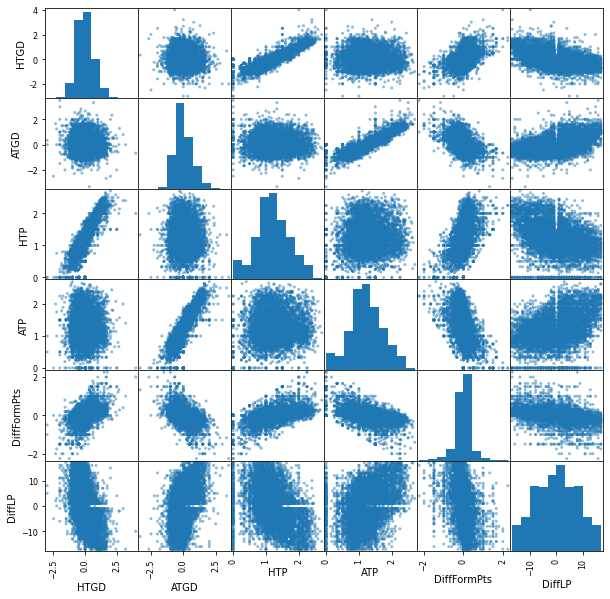

In [35]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

#the scatter matrix is plotting each of the columns specified against each other column.
#You would have observed that the diagonal graph is defined as a histogram, which means that in the 
#section of the plot matrix where the variable is against itself, a histogram is plotted.

#Scatter plots show how much one variable is affected by another. 
#The relationship between two variables is called their correlation
#negative vs positive correlation

#HTGD - Home team goal difference
#ATGD - away team goal difference
#HTP - Home team points
#ATP - Away team points
#DiffFormPts Diff in points
#DiffLP - Differnece in last years prediction

scatter_matrix(data[['HTGD','ATGD','HTP','ATP','DiffFormPts','DiffLP']], figsize=(10,10))

In [ ]:
# Here we will be preparing the data.

# Seperate into feature and target variable
# FTR = Full Time Result (H=Home, D=Draw, A=Away Win)
X_all = data.drop(['FTR'],1)
Y_all = data['FTR']

# Standardising the data
from sklearn.preprocessing import scale

# Center to the mean and component wise scale to unit varience.
cols = [['HTGD','ATGD','HTP','ATP','DiffLP']]
for col in cols:
  X_all[col] = scale(X_all[col])

In [1]:
# last 3 wins for both sides
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.HM4 = X_all.HM4.astype('str')
X_all.HM5 = X_all.HM5.astype('str')

def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features


NameError: ignored